# Sentiment Analysis with twitter data  
This project entails analyzing the sentiment associated with tweets on the current pandemic of covid-19.  
The data is obtained from twitter using a script I designed,you may have a look at it [here.](https://github.com/lyraxvincent/twitter-tweepy/blob/master/tweetscrap.py) (with a few modifications of the script of course)  
I modified the script to fit the needs:
- Tweets obtained are only from the country Kenya
- Tweets obtained are only in the English language
- No retweets obtained

I used the powerful text processing python module **TextBlob** for this task.

**Import necessary modules**

In [56]:
import pandas as pd
from textblob import TextBlob

Load the data

In [57]:
tweets = pd.read_csv('covidKE tweets.csv')

Viewing the data

In [58]:
tweets.head()

,tweet_id,text,created_at,likes
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0


In [59]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1190 non-null   int64 
 1   text        1190 non-null   object
 2   created_at  1190 non-null   object
 3   likes       1190 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 37.3+ KB


An example to show how we get the sentiment score/polarity for a single tweet

In [60]:
TextBlob(tweets.text[0]).sentiment

Sentiment(polarity=0.39999999999999997, subjectivity=0.6000000000000001)

In [61]:
TextBlob(tweets['text'][0]).sentiment.polarity

0.39999999999999997

Let's add a numerical column relating to text; text length 

In [62]:
tweets['text length'] = tweets['text'].apply(len)

In [63]:
tweets.head()

,tweet_id,text,created_at,likes,text length
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1,126
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0,39
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0,140
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0,104
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0,131


Now we design a function to apply to the text column to produce polarity for each tweet

In [64]:
def get_polarity(text):
    return TextBlob(text).sentiment.polarity

We add a new column to the dataframe based off of tweet polarity

In [65]:
tweets['polarity'] = tweets['text'].apply(get_polarity)

In [66]:
# Short form using lambda

#tweets['polarity'] = tweets['text'].apply(lambda text: TextBlob(text).sentiment.polarity)

In [67]:
tweets.sample(30)

,tweet_id,text,created_at,likes,text length,polarity
969,1242080246758879246,There's so much that we can learn from #corona...,2020-03-23 13:26:22,0,140,0.200000
112,1242119325349285889,The government should give us names of #corona...,2020-03-23 16:01:39,0,80,0.000000
123,1242112296496791557,I have realized most civil servants are saying...,2020-03-23 15:33:43,0,140,0.500000
452,1242102922281766912,1. Covid-19 Arrived From Space\nKicking off th...,2020-03-23 14:56:28,0,133,0.166667
976,1242079827290738688,#coronaviruskenya has come as a cash cow for s...,2020-03-23 13:24:42,0,140,0.183333
369,1242077487011676163,#FeaturingApocalypse\nLet us go back to the LO...,2020-03-23 13:15:24,0,87,0.000000
194,1242084889685614592,Sabina joy closed for the first time since 197...,2020-03-23 13:44:49,2,80,0.316667
579,1242098133062029325,CS Mutahi Kagwe is not being realistic telling...,2020-03-23 14:37:26,2,140,0.000000
581,1242067277010386951,"Young men, especially between 21 and 33.... #D...",2020-03-23 12:34:49,0,140,0.033333
437,1242074174002286593,#coronaviruskenya\nNOW KENYANS YOU HAVE FREEDO...,2020-03-23 13:02:14,2,126,0.000000


Tweets with lowest polarity(-1)

In [68]:
tweets[tweets['polarity'] == -1]

,tweet_id,text,created_at,likes,text length,polarity
357,1242106974927573000,@SafaricomPLC Apana tunataka zile za 200 MBs ....,2020-03-23 15:12:34,2,140,-1.0
645,1242096205234085894,The worst thing about #MulikaCorona #coronavir...,2020-03-23 14:29:47,1,140,-1.0
1009,1242077721976545280,#kplccustomercare this is the worst time to cu...,2020-03-23 13:16:20,0,113,-1.0


Tweets with polarity 0

In [69]:
tweets[tweets['polarity'] == 0]

,tweet_id,text,created_at,likes,text length,polarity
1,1242123396684697603,The next one week 😷\n\n #coronaviruskenya,2020-03-23 16:17:49,0,39,0.0
2,1242123373188124673,#coronaviruskenya #LockdownNow #UhuruKenyatta ...,2020-03-23 16:17:44,0,140,0.0
3,1242086219519012867,Internet never forget we will remind you that ...,2020-03-23 13:50:06,0,104,0.0
4,1242123367882330113,@ntsa_kenya @DCI_Kenya #coronaviruskenya If on...,2020-03-23 16:17:43,0,131,0.0
5,1242123307903844353,I like what @HassanAliJoho said about #coronav...,2020-03-23 16:17:28,0,74,0.0
...,...,...,...,...,...,...
1181,1242064302816874502,@Its_Jakusa @GeorgeW27191819 The inequality in...,2020-03-23 12:23:00,0,140,0.0
1182,1242064212895174662,1 death in Zimbabwe with only 3 Corona Virus c...,2020-03-23 12:22:39,4,69,0.0
1183,1242064211800477697,Three Kakamega County officials who came back ...,2020-03-23 12:22:39,2,140,0.0
1184,1242064200840744960,Let's be Graceful enough to observe protocol. ...,2020-03-23 12:22:36,2,139,0.0


Tweets with highest polarity(1)

In [70]:
tweets[tweets['polarity'] == 1]

,tweet_id,text,created_at,likes,text length,polarity
237,1242112888082481153,#coronaviruskenya Lets be the best version of...,2020-03-23 15:36:04,0,108,1.0
1055,1242074830842793985,This is probably the best thing you'll read to...,2020-03-23 13:04:50,1,140,1.0
1066,1242073657297551370,We create the best shoe impression \n\n#Minuel...,2020-03-23 13:00:11,0,140,1.0


In [71]:
# It is evident that almost half of the obtained tweets have polarity 0

Tweets with negative polarity

In [72]:
tweets[tweets['polarity'] < 0]

,tweet_id,text,created_at,likes,text length,polarity
10,1242099789694750720,I need help here does it mean ukipata corona n...,2020-03-23 14:44:01,1,98,-0.3125
11,1242099788893564929,Not having money during this #coronaviruskenya...,2020-03-23 14:44:01,0,140,-0.5000
14,1242116304934440961,I hope CS Mutahi can see what other government...,2020-03-23 15:49:39,6,101,-0.1250
19,1242122752032718849,I don't understand why mutahi is pleading with...,2020-03-23 16:15:16,1,140,-0.1250
26,1242085595842838529,The Unga revolution we've all been waiting for...,2020-03-23 13:47:37,0,130,-0.3000
...,...,...,...,...,...,...
1171,1242064802916306944,@KanzeDena finally its out there.Thank you\nNo...,2020-03-23 12:25:00,4,126,-0.2000
1172,1242064801540591621,@citizentvkenya #coronaviruskenya \nSo sad. \n...,2020-03-23 12:24:59,3,72,-0.5000
1174,1242064688533438464,@StarTimesKenya you have very poor services a...,2020-03-23 12:24:32,2,140,-0.5200
1186,1242064012797530112,@OleItumbi Time to put it mandatory😓😓I hate wh...,2020-03-23 12:21:51,1,125,-0.8000


Tweets with positive polarity

In [73]:
tweets[tweets['polarity'] > 0]

,tweet_id,text,created_at,likes,text length,polarity
0,1242123434466979841,Everyday might not be good but there's always ...,2020-03-23 16:17:58,1,126,0.400000
8,1242069774231887880,I wish this would have been the much anticipat...,2020-03-23 12:44:45,2,140,0.100000
13,1242116336739913728,Taken out since last Friday to buy gas. Seems ...,2020-03-23 15:49:46,1,140,0.037500
16,1242122964608434181,We are in this together.\nLet's be safe and st...,2020-03-23 16:16:06,1,126,0.500000
20,1242099340342067203,Confirmed #coronavirus cases in Kenya stands a...,2020-03-23 14:42:14,5,128,0.433333
...,...,...,...,...,...,...
1176,1242064663577272321,Advice for Young Cubs Looking for Sugar Mummy ...,2020-03-23 12:24:26,1,140,0.100000
1177,1242064476834324481,One would have wished to see a more emotional ...,2020-03-23 12:23:42,4,128,0.250000
1179,1242064465413226496,Very soon some parts of the country will start...,2020-03-23 12:23:39,2,140,0.200000
1185,1242064075405905921,SIAYA EMERGENCY response team sent to trace co...,2020-03-23 12:22:06,4,139,0.113636


## Some EDA

In [74]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('whitegrid')

**Distribution of polarity**

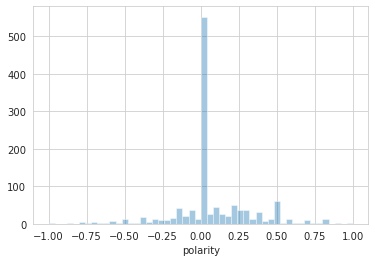

In [75]:
sns.distplot(tweets['polarity'], bins=50, kde=False)

**Distribution of text length**

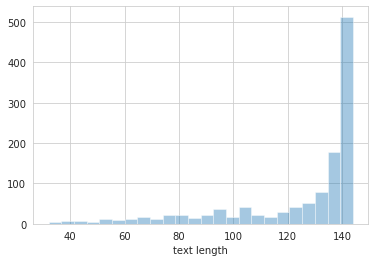

In [76]:
sns.distplot(tweets['text length'], kde=False)

A jointplot to show relation of text length and polarity

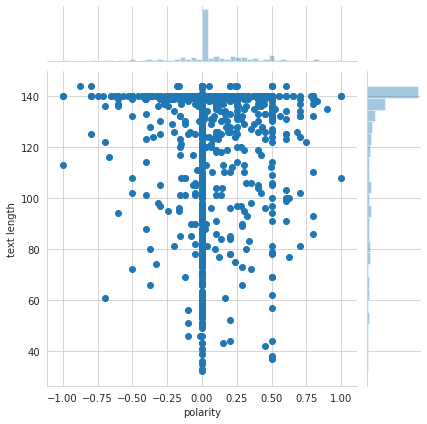

In [79]:
sns.jointplot(x='polarity', y='text length', data=tweets)

From this plot, we see that most lengthy tweets are associated with a polarity of 0  
Let's get the mean length of tweets with polarity 0 to see that indeed that's the case:

In [81]:
tweets[tweets['polarity']==0]['text length'].mean()

118.22095238095238

To further visualize this fact, let's create the same plot but of hexagonal and regressional nature

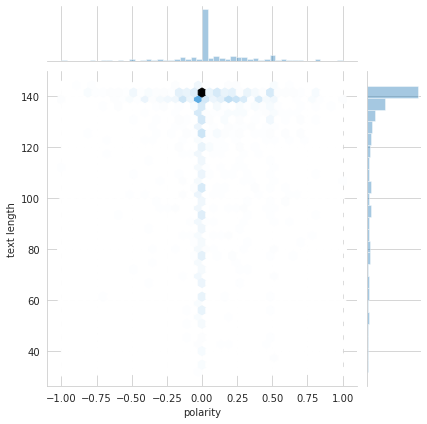

In [97]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='hex')

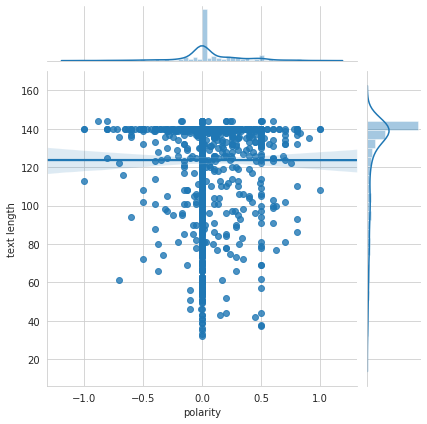

In [83]:
sns.jointplot(x='polarity', y='text length', data=tweets, kind='reg')

## Project conclusion

Clearly, we have seen that like half of the tweets have polarity of 0.  
Does this mean that when a population is under such fear and anxiety of an epidemic, their messages express no negativity or positivity but are more neutral?